In [16]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import time

def rmse(x,y,theta):
    hypothesis = np.dot(x,theta)
    cost = np.average((y-hypothesis) ** 2)
    rmse = (math.sqrt(cost))
    return rmse
    




dir_list = os.listdir('C:\\Users\\saikiran\\Downloads\\dataset')
#print(len(dir_list))
with open('C:\\Users\\saikiran\\Downloads\\dataset_combined\\combined.txt', 'w') as outfile:
    for fname in dir_list:
        with open('C:\\Users\\saikiran\\Downloads\\dataset\\'+fname) as infile:
            for line in infile:
                outfile.write(line)
    
data = load_svmlight_file('C:\\Users\\saikiran\\Downloads\\dataset_combined\\combined.txt')
X = data[0]
X = X[:2000]
X = X.toarray()
bias = np.ones((len(X),1), dtype=int)
X = np.concatenate((bias,X),axis=1)
Y = data[1]
Y = Y[:2000]
Y = Y.reshape(len(Y),1)

np.random.seed(0)
#beta = np.random.rand(X.shape[1],1)
#beta = np.random.uniform(0.00005,0.0001,X.shape[1])
beta = np.random.uniform(0.001,0.01,X.shape[1])
beta = beta.reshape(len(beta),1)
#beta = np.around(beta, decimals=3)
alpha = 0.0000000001

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
Rmse_train_list =[]
Rmse_test_list =[]
start = time.time()
for i in range (0,100):
    x_train,y_train = shuffle(X_train,Y_train, random_state=0)
    for j in range(len(x_train)):
        hypothesis = np.dot(x_train[j], beta)
        gradient =  np.multiply(x_train[j].T,(y_train[j]-hypothesis))
        gradient = gradient.reshape(len(gradient),1)
        beta = beta + np.multiply(alpha,gradient)
    RMSE_train = rmse(X_train,Y_train,beta)
    RMSE_test = rmse(X_test,Y_test,beta)
    Rmse_train_list = np.append(Rmse_train_list,RMSE_train)
    Rmse_test_list = np.append(Rmse_test_list,RMSE_test)

end = time.time()
print("execution time is:", end-start)
for i in range (len(Rmse_train_list)):
    if i==0:
        print("epoch={} and total train_RMSE={}".format(i,Rmse_train_list[i]))
    else:
        rmse_diff =abs(Rmse_train_list[i]-Rmse_train_list[i-1])
        if rmse_diff<0.01:
            print("converged at epoch={}".format(i))
            break
        else:
            print("epoch={} and total train_RMSE={}".format(i,Rmse_train_list[i]))
for i in range (len(Rmse_train_list)):
        print("epoch={} and total test_RMSE={}".format(i,Rmse_test_list[i]))
           
        

execution time is: 2.9372940063476562
epoch=0 and total train_RMSE=28.881949977992456
epoch=1 and total train_RMSE=20.15496307057121
epoch=2 and total train_RMSE=15.173627536198783
epoch=3 and total train_RMSE=12.311650259714376
epoch=4 and total train_RMSE=10.58819387261098
epoch=5 and total train_RMSE=9.458699600919998
epoch=6 and total train_RMSE=8.644282289065574
epoch=7 and total train_RMSE=8.007952656446731
epoch=8 and total train_RMSE=7.4820833003009835
epoch=9 and total train_RMSE=7.031777926559796
epoch=10 and total train_RMSE=6.63769261114157
epoch=11 and total train_RMSE=6.288148360271087
epoch=12 and total train_RMSE=5.975461823349064
epoch=13 and total train_RMSE=5.694176832072597
epoch=14 and total train_RMSE=5.440169172225608
epoch=15 and total train_RMSE=5.210167377649484
epoch=16 and total train_RMSE=5.001481137813325
epoch=17 and total train_RMSE=4.81183866176207
epoch=18 and total train_RMSE=4.639284127890148
epoch=19 and total train_RMSE=4.482109836838191
epoch=20 a

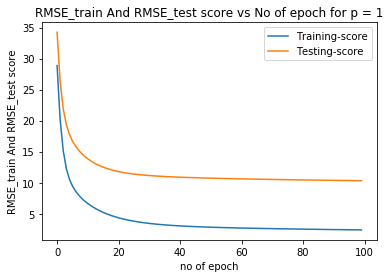

In [17]:
epoch = np.arange(100)
plt.plot(epoch,Rmse_train_list)
plt.plot(epoch,Rmse_test_list)
plt.ylabel("RMSE_train And RMSE_test score")
plt.xlabel("no of epoch")
plt.title("RMSE_train And RMSE_test score vs No of epoch for p = 1")
plt.legend(['Training-score', 'Testing-score'], loc='upper right')
plt.show()